In [5]:
import pandas as pd
import numpy as np

# Load your original dataset
original_data = pd.read_csv('anova_selector.csv')

# Shuffle and mix the dataset
mixed_data = original_data.sample(frac=1, random_state=42)

# Save the mixed dataset to a new CSV file
mixed_data.to_csv('mixed_dataset.csv', index=False)


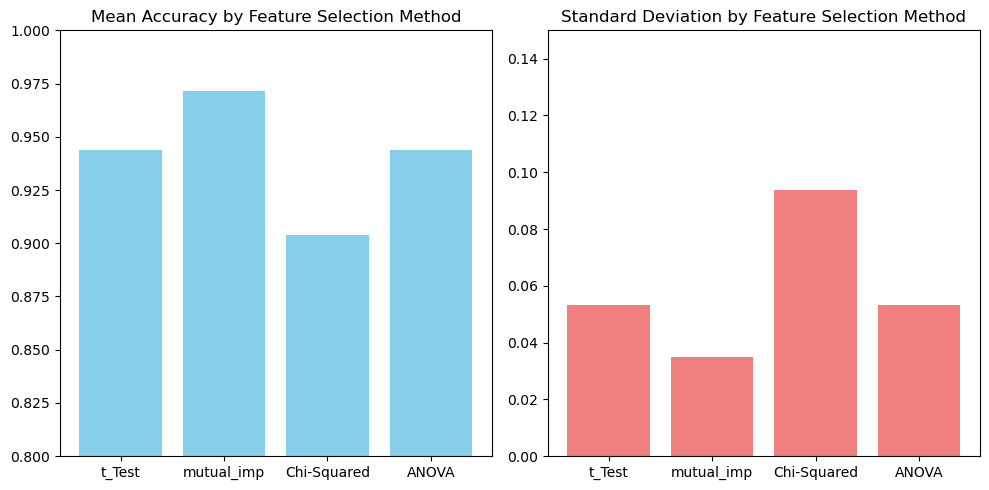

In [7]:
import matplotlib.pyplot as plt

# Data
feature_selection_methods = ["t_Test", "mutual_imp", "Chi-Squared", "ANOVA"]
mean_accuracies = [0.9438, 0.9714, 0.9038, 0.9438]
std_deviations = [0.0532, 0.0350, 0.0939, 0.0532]

# Create bar graphs for mean accuracy
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.bar(feature_selection_methods, mean_accuracies, color='skyblue')
plt.title('Mean Accuracy by Feature Selection Method')
plt.ylim(0.8, 1.0)

# Create bar graphs for standard deviation
plt.subplot(122)
plt.bar(feature_selection_methods, std_deviations, color='lightcoral')
plt.title('Standard Deviation by Feature Selection Method')
plt.ylim(0.0, 0.15)

plt.tight_layout()
plt.show()


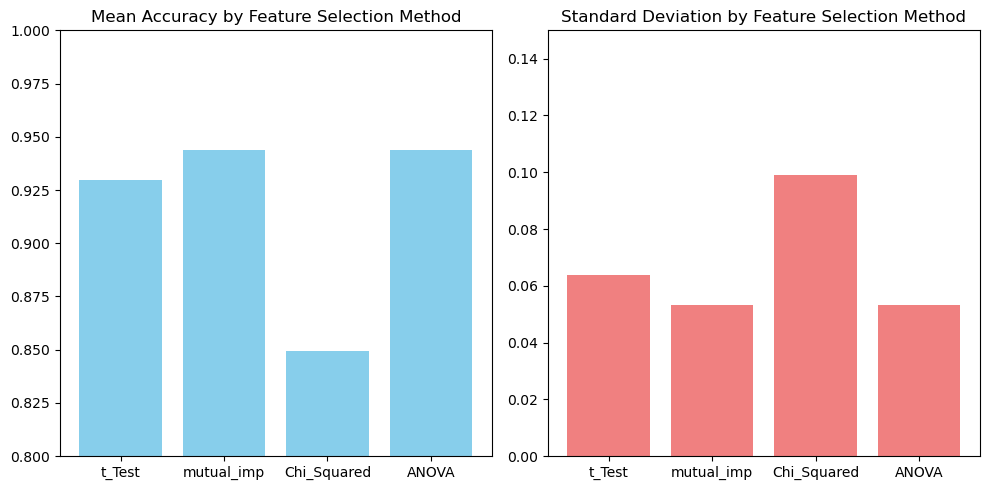

In [9]:
import matplotlib.pyplot as plt

# Data
feature_selection_methods = ["t_Test", "mutual_imp", "Chi_Squared", "ANOVA"]
mean_accuracies = [0.9295, 0.9438, 0.8495, 0.9438]
std_deviations = [0.0639, 0.0532, 0.0989, 0.0532]

# Create bar graphs for mean accuracy
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.bar(feature_selection_methods, mean_accuracies, color='skyblue')
plt.title('Mean Accuracy by Feature Selection Method')
plt.ylim(0.8, 1.0)

# Create bar graphs for standard deviation
plt.subplot(122)
plt.bar(feature_selection_methods, std_deviations, color='lightcoral')
plt.title('Standard Deviation by Feature Selection Method')
plt.ylim(0.0, 0.15)

plt.tight_layout()
plt.show()


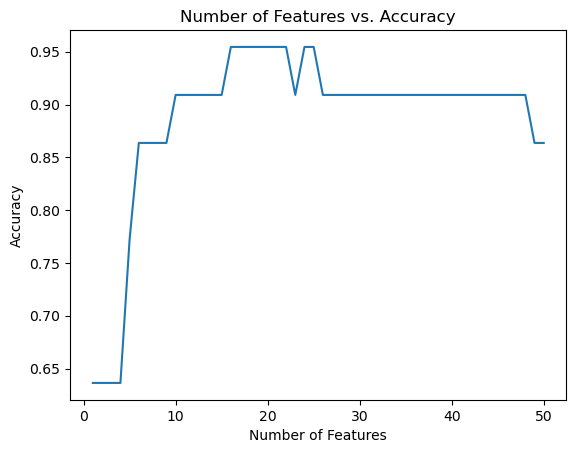

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Load methylation dataset
data = pd.read_csv('selected_features_50_m.csv')

X = data.drop('obesity', axis=1)  # Features
y = data['obesity']  # Target variable

# Perform feature selection using mutual information
mi_scores = mutual_info_classif(X, y)
sorted_indices = np.argsort(mi_scores)[::-1]

# Try SVM with different number of features
results = []
for i in range(1, 51):
    # Use top i features for training
    X_train_top = X_train.iloc[:, sorted_indices[:i]]
    X_test_top = X_test.iloc[:, sorted_indices[:i]]
    
    # Train SVM model
    svm = SVC(kernel='linear')
    svm.fit(X_train_top, y_train)
    
    # Test SVM model
    accuracy = svm.score(X_test_top, y_test)
    results.append((i, accuracy))

# Plot results
x, y = zip(*results)
plt.plot(x, y)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your methylation dataset
data = pd.read_csv('selected_features_50_m.csv')

X = data.drop('obesity', axis=1)  # Features
y = data['obesity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply mutual information feature selection to select the top 20 features
k = 40  # Number of features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Initialize the SVM classifier
svm = SVC(kernel='linear')  # You can use other kernels if needed

# Train the SVM model on the selected features
svm.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_new)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model with {k} selected features: {accuracy:.2f}")

Accuracy of the SVM model with 40 selected features: 0.93
